In [2]:
!git clone https://github.com/snrao310/ASL-Finger-Spelling-Recognition.git

Cloning into 'ASL-Finger-Spelling-Recognition'...
remote: Enumerating objects: 10272, done.
remote: Total 10272 (delta 0), reused 0 (delta 0), pack-reused 10272
Receiving objects: 100% (10272/10272), 83.87 MiB | 29.16 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [184]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 450kB 60.4MB/s 
     |████████████████████████████████| 3.8MB 38.6MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [185]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-i9of88e9
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-i9of88e9
  Created wheel for efficientnet: filename=efficientnet-1.0.0-cp36-none-any.whl size=17686 sha256=dc2823840e8d54b9de23bdb1895629f64a17e21dc2db17cbd498581eb02519ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-2cruf2_j/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet


In [0]:
from pathlib import Path
working_dir = Path("ASL-Finger-Spelling-Recognition/asl_dataset/")

In [2]:
working_dir

PosixPath('ASL-Finger-Spelling-Recognition/asl_dataset')

In [0]:
all_image_paths = list(working_dir.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths]

In [4]:
all_image_paths[:10]

['ASL-Finger-Spelling-Recognition/asl_dataset/p/hand2_p_left_seg_3_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand5_p_dif_seg_4_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand4_p_bot_seg_5_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand1_p_left_seg_5_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand1_p_top_seg_3_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand1_p_left_seg_2_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand2_p_dif_seg_4_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand2_p_top_seg_2_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand5_p_dif_seg_1_cropped.jpeg',
 'ASL-Finger-Spelling-Recognition/asl_dataset/p/hand1_p_right_seg_5_cropped.jpeg']

In [0]:
all_image_labels = list(map(lambda x : x.split("/")[-2] , all_image_paths))

In [6]:
all_image_labels[:10]

['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p']

In [0]:
from sklearn.utils import shuffle 

all_image_paths , all_image_labels = shuffle(all_image_paths , all_image_labels)

In [8]:
all_image_labels[:10]

['v', '6', 'x', 'd', '9', 'u', 'k', 'f', 'f', 'i']

In [9]:
import cv2
import numpy as np

'''
def ProcessImage( img_path , mode = 'color' , resize = False , blur = False, size = 32):
    if mode == 'GrayScale':
        img = cv2.imread( img_path , cv2.IMREAD_GRAYSCALE)
    elif mode == 'DontChange':
        img = cv2.imread( img_path , cv2.IMREAD_UNCHANGED)
    else :
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    if resize == True :
        img = cv2.resize(img , (size , size))
    if blur == True :
        img = cv2.GaussianBlur(img , (3,3) , 0)
    return img.astype(np.float16)
'''

"\ndef ProcessImage( img_path , mode = 'color' , resize = False , blur = False, size = 32):\n    if mode == 'GrayScale':\n        img = cv2.imread( img_path , cv2.IMREAD_GRAYSCALE)\n    elif mode == 'DontChange':\n        img = cv2.imread( img_path , cv2.IMREAD_UNCHANGED)\n    else :\n        img = cv2.imread(img_path)\n        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)\n    if resize == True :\n        img = cv2.resize(img , (size , size))\n    if blur == True :\n        img = cv2.GaussianBlur(img , (3,3) , 0)\n    return img.astype(np.float16)\n"

In [0]:
def ProcessImage(img_path):
    img = cv2.imread(img_path)
    img0 = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    img1 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    ret , thresh = cv2.threshold(img0,30,255,cv2.THRESH_BINARY)
    img1[thresh != 0] = [255 , 255 , 255]
    img1 = cv2.resize(img1 , (224 , 224))
    return img1

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint , LearningRateScheduler , ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

def lr_schedule(epoch):
	lr = 1e-2
	if epoch > 8:
		lr *= 0.5e-3
	elif epoch > 12:
		lr *= 1e-3
	elif epoch > 20:
		lr *= 1e-2
	elif epoch > 40:
		lr *= 1e-1
	print('Learning rate: ', lr)
	return lr

def getCallBacks():
	checkpoint = ModelCheckpoint(filepath="model.h5",
	                             monitor='val_accuracy',
	                             verbose=1,
	                             save_best_only=True,save_weights_only = True)

	lr_scheduler = LearningRateScheduler(lr_schedule)

	lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
	                               cooldown=0,
	                               patience=5,
	                               min_lr=0.5e-6)

	callbacks = [checkpoint, lr_reducer, lr_scheduler]

	return callbacks

In [0]:
def CustomGenerator(train : list , batch_size : int , for_train = True):
	Paths , Labels = train[0] , train[1]
	num_samples = len(Paths)
	while True :
		if for_train :
			Paths , Labels = shuffle(Paths , Labels)
		for i in range(0 , num_samples , batch_size):
			Selected_paths = Paths[i:i+batch_size]
			Selected_labels = Labels[i:i+batch_size]

			Xtrain = []
			Ytrain = []

			for i , j in zip(Selected_paths , Selected_labels):
				Xtrain.append(ProcessImage(i))
				Ytrain.append(j)

			Xtrain = np.array(Xtrain)
			Ytrain = np.array(Ytrain)

			yield Xtrain , Ytrain

In [0]:
def Conv_to_Num(labels : list , dic = None):
	dic_ = dic
	if dic is None :
		dic_ = {}
		unique_L = list(set(labels))
		for i , j in enumerate(unique_L) :
			dic_[j] = i

	new_Labels = []
	for i in labels :
		new_Labels.append(dic_[i])

	if dic is None :
		return new_Labels , dic_ 
	else :
		return new_Labels

In [0]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(all_image_paths , all_image_labels)

In [0]:
Ytrain , dic  = Conv_to_Num(Ytrain)

In [0]:
Ytest = Conv_to_Num(Ytest , dic = dic)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
Ytrain = to_categorical(Ytrain)
Ytest = to_categorical(Ytest)

In [19]:
print(Ytrain.shape)
print(Ytest.shape)

(1886, 36)
(629, 36)


In [0]:
train = [Xtrain , Ytrain]
test = [Xtest , Ytest]

In [0]:
TrainGen = CustomGenerator(train , batch_size = 32 , for_train = True)
TestGen = CustomGenerator(test , batch_size = 32 , for_train = False)

In [0]:
import efficientnet.tfkeras as efn 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base_model =  efn.EfficientNetB0(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
    x = base_model.output
    y_pred = Dense(36, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=y_pred)

In [23]:
model = get_model()

16809984/16804768 [==============================] - 1s 0us/step


In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [0]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy',metrics = ['accuracy'])

In [26]:
model.fit_generator(TrainGen,steps_per_epoch=len(train[1])//32, epochs = 10 , verbose = 1 ,validation_data=TestGen,validation_steps=len(test[0])//32 , callbacks = getCallBacks())

Learning rate:  0.01
Epoch 1/10
57/58 [============================>.] - ETA: 0s - loss: 2.1889 - accuracy: 0.4923
Epoch 00001: val_accuracy improved from -inf to 0.02796, saving model to model.h5
58/58 [==============================] - 38s 656ms/step - loss: 2.1619 - accuracy: 0.5005 - val_loss: 3.8343 - val_accuracy: 0.0280
Learning rate:  0.01
Epoch 2/10
57/58 [============================>.] - ETA: 0s - loss: 0.3626 - accuracy: 0.9166
Epoch 00002: val_accuracy improved from 0.02796 to 0.82915, saving model to model.h5
58/58 [==============================] - 33s 573ms/step - loss: 0.3612 - accuracy: 0.9164 - val_loss: 0.5411 - val_accuracy: 0.8291
Learning rate:  0.01
Epoch 3/10
57/58 [============================>.] - ETA: 0s - loss: 0.1498 - accuracy: 0.9649
Epoch 00003: val_accuracy improved from 0.82915 to 0.90452, saving model to model.h5
58/58 [==============================] - 33s 573ms/step - loss: 0.1488 - accuracy: 0.9655 - val_loss: 0.3176 - val_accuracy: 0.9045
Learnin

In [0]:
model.load_weights("model.h5")

In [0]:
model.save("FinalModel.h5")

In [0]:
from tensorflow.keras.models import load_model

new_model = load_model("FinalModel.h5")

In [30]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 32) 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 32) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [31]:
dic

{'0': 24,
 '1': 29,
 '2': 11,
 '3': 0,
 '4': 33,
 '5': 27,
 '6': 8,
 '7': 14,
 '8': 4,
 '9': 12,
 'a': 30,
 'b': 1,
 'c': 2,
 'd': 19,
 'e': 18,
 'f': 5,
 'g': 22,
 'h': 9,
 'i': 7,
 'j': 3,
 'k': 17,
 'l': 10,
 'm': 20,
 'n': 6,
 'o': 32,
 'p': 31,
 'q': 25,
 'r': 34,
 's': 15,
 't': 26,
 'u': 28,
 'v': 21,
 'w': 35,
 'x': 23,
 'y': 16,
 'z': 13}

In [0]:
import pickle

pickle_out = open("model.pck","wb")
pickle.dump(dic, pickle_out)
pickle_out.close()

**Processing HandImage**

In [0]:
from pathlib import Path
import numpy as np
working_dir = Path("ASL-Finger-Spelling-Recognition/asl_dataset/")

In [0]:
imgs = list(map(lambda x : str(x) , list(working_dir.glob("*/*"))))

In [0]:
work = np.random.choice(imgs)

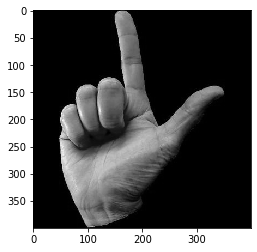

In [152]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(work)
img2 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

plt.imshow(img , cmap = "gray")

In [0]:
ret,thresh1 = cv2.threshold(img,30,255,cv2.THRESH_BINARY)

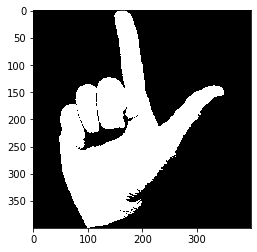

In [154]:
plt.imshow(thresh1 , cmap = "gray")

In [155]:
print(thresh1.shape)

(400, 400)


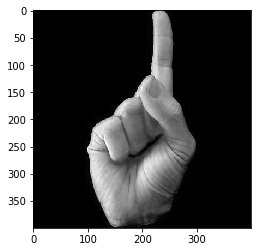

In [136]:
plt.imshow(img1[: , : , 2] , cmap = "gray")

In [0]:
img2[thresh1 != 0] = [255 , 255 , 255]

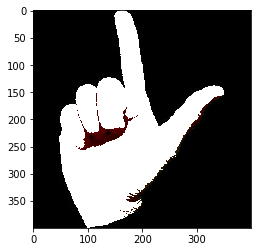

In [157]:
plt.imshow(img2)

In [158]:
img2.shape

(400, 400, 3)

In [0]:
def Process(img):
    img0 = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    img1 = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    ret , thresh = cv2.threshold(img0,30,255,cv2.THRESH_BINARY)
    img1[thresh != 0] = [255 , 255 , 255]
    return img1

In [0]:
img = cv2.imread(work)
img = Process(img)

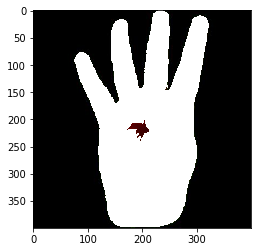

In [172]:
plt.imshow(img)